# **Chicago Crimes Analysis**

## Import Libraries

In [200]:
import pandas as pd # Dataframe operations
import matplotlib.pyplot as plt # Plots
import seaborn as sns # Plots
import folium # Geospacial graphs

from datetime import datetime # Convert to datetime 

plt.rcParams['figure.figsize'] = [10, 5]

## Load Data

Data of crimes in Chicago since 2017 until 2023

In [201]:
df = pd.read_csv("Data/Chicago_Crimes_2017-2023.csv")
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13327763,JH103488,12/31/2023 11:59:00 PM,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,27.0,8.0,14,1173727.0,1907173.0,2023,01/08/2024 03:59:56 PM,41.900698,-87.637330,"(41.900698378, -87.637329754)"
1,13325009,JH100002,12/31/2023 11:51:00 PM,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,20.0,37.0,04A,1175152.0,1871065.0,2023,01/17/2024 03:41:31 PM,41.801584,-87.633177,"(41.801583507, -87.633177068)"
2,13324997,JH100010,12/31/2023 11:51:00 PM,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,8.0,69.0,04A,1183685.0,1854148.0,2023,01/08/2024 03:59:56 PM,41.754967,-87.602411,"(41.754966726, -87.602410989)"
3,13327752,JH102557,12/31/2023 11:50:00 PM,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,42.0,32.0,06,1175349.0,1902127.0,2023,01/08/2024 03:59:56 PM,41.886816,-87.631524,"(41.886815622, -87.631523712)"
4,13324881,JH100006,12/31/2023 11:50:00 PM,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,14.0,63.0,08B,1159244.0,1870437.0,2023,01/08/2024 03:59:56 PM,41.800201,-87.691535,"(41.800200965, -87.691535096)"


In [202]:
# Shape
df.shape

(1722109, 22)

In [203]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722109 entries, 0 to 1722108
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Case Number           object 
 2   Date                  object 
 3   Block                 object 
 4   IUCR                  object 
 5   Primary Type          object 
 6   Description           object 
 7   Location Description  object 
 8   Arrest                bool   
 9   Domestic              bool   
 10  Beat                  int64  
 11  District              float64
 12  Ward                  float64
 13  Community Area        float64
 14  FBI Code              object 
 15  X Coordinate          float64
 16  Y Coordinate          float64
 17  Year                  int64  
 18  Updated On            object 
 19  Latitude              float64
 20  Longitude             float64
 21  Location              object 
dtypes: bool(2), float64(7), int64(3), object(1

The description of each column is showed in the [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-Present/ijzp-q8t2)

## Exploratory Data Analysis (EDA)

In [204]:
# Convert date columns into date_time type

df["Date"] = pd.to_datetime(df["Date"])
df.info()

C:\Users\acast\AppData\Local\Temp\ipykernel_20552\2838153455.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722109 entries, 0 to 1722108
Data columns (total 22 columns):
 #   Column                Dtype         
---  ------                -----         
 0   ID                    int64         
 1   Case Number           object        
 2   Date                  datetime64[ns]
 3   Block                 object        
 4   IUCR                  object        
 5   Primary Type          object        
 6   Description           object        
 7   Location Description  object        
 8   Arrest                bool          
 9   Domestic              bool          
 10  Beat                  int64         
 11  District              float64       
 12  Ward                  float64       
 13  Community Area        float64       
 14  FBI Code              object        
 15  X Coordinate          float64       
 16  Y Coordinate          float64       
 17  Year                  int64         
 18  Updated On            object        
 19  

In [205]:
# Extract date information

df["Month"] = df["Date"].dt.month
df["Day"] = df["Date"].dt.day
df["Day_Week"] = df["Date"].dt.dayofweek
df["Hour"] = df["Date"].dt.hour
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
0,13327763,JH103488,2023-12-31 23:59:00,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1907173.0,2023,01/08/2024 03:59:56 PM,41.900698,-87.637330,"(41.900698378, -87.637329754)",12,31,6,23
1,13325009,JH100002,2023-12-31 23:51:00,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,1871065.0,2023,01/17/2024 03:41:31 PM,41.801584,-87.633177,"(41.801583507, -87.633177068)",12,31,6,23
2,13324997,JH100010,2023-12-31 23:51:00,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,1854148.0,2023,01/08/2024 03:59:56 PM,41.754967,-87.602411,"(41.754966726, -87.602410989)",12,31,6,23
3,13327752,JH102557,2023-12-31 23:50:00,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1902127.0,2023,01/08/2024 03:59:56 PM,41.886816,-87.631524,"(41.886815622, -87.631523712)",12,31,6,23
4,13324881,JH100006,2023-12-31 23:50:00,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1870437.0,2023,01/08/2024 03:59:56 PM,41.800201,-87.691535,"(41.800200965, -87.691535096)",12,31,6,23


#### **1. How has been the change of numbers of crimes from 2017 to 2023?**

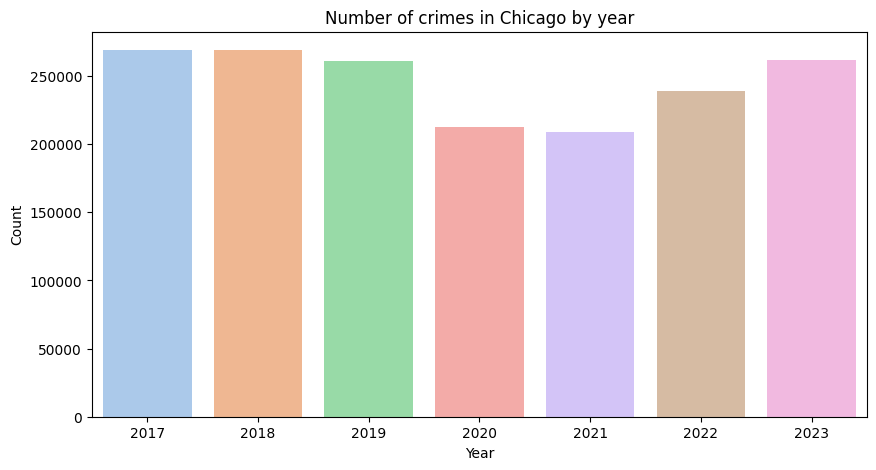

In [206]:
sns.countplot(data = df, x = "Year", hue = "Year", palette = "pastel", legend = False)
plt.ylabel("Count")
plt.title("Number of crimes in Chicago by year")
plt.show()


*There was a reduction in the number of crimes in 2020 and 2021, possibly due to the of COVID-19 pandemic*

#### **2. What are the months, days of the week, and time of day with the highest crime rates?**

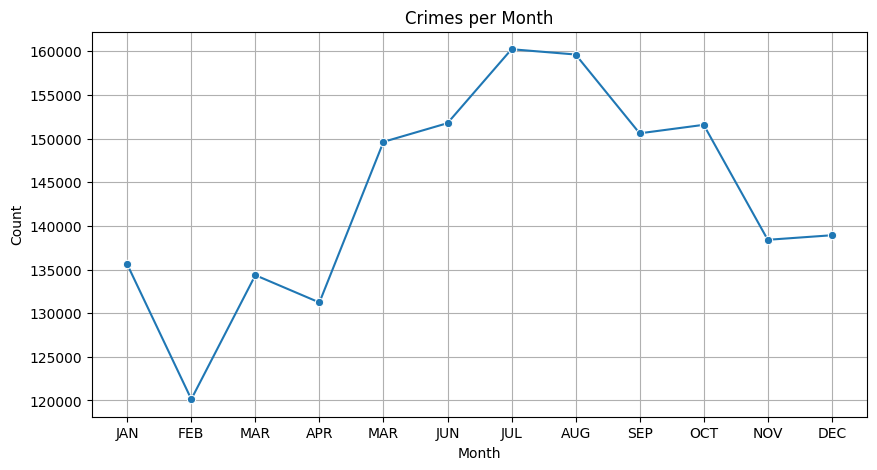

In [207]:
# Month
sns.lineplot(x = "Month", 
             y = "count", 
             data = df["Month"].value_counts().reset_index(), 
             marker = "o")
plt.ylabel("Count")
plt.xticks(range(1,13), ['JAN', 'FEB', 'MAR', 'APR', 'MAR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.grid()
plt.title("Crimes per Month")
plt.show()

The months with more crimes are *July* and *August*, these are summer months, therefore, the high number of crimes could be related to an increase in the number of persons in the city. 

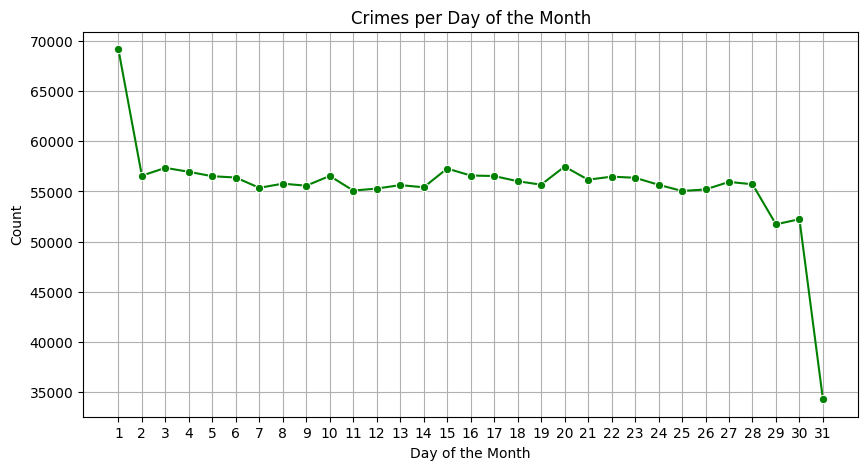

In [208]:
# Day of the month
sns.lineplot(x = "Day", 
             y = "count", 
             data = df["Day"].value_counts().reset_index(), 
             marker = "o",
             color = "g")
plt.ylabel("Count")
plt.xlabel("Day of the Month")
plt.xticks(range(1,32))
plt.grid()
plt.title("Crimes per Day of the Month")
plt.show()

The first day of the month has a high rate of crimes, but this could be a data registration problem. If a crime is not upload with all the date information it's possibly that the system set the day of the crime as the first day of the month. 

On the other hand, days *29*, *30* and*31* has a low rate of crimes, because no all months have 29, 30 and 31 days. 

So lets plot the same graph without taking into account the first and last days

In [209]:
df_days_2_28 = df[~((df["Day"] == 1) | (df["Day"] == 31) | (df["Day"] == 30) | (df["Day"] == 29))]
df_days_2_28.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
2054,13321996,JG558059,2023-12-28 23:55:00,062XX N NORTHWEST HWY,0560,ASSAULT,SIMPLE,STREET,True,False,...,1941240.0,2023,01/05/2024 03:40:51 PM,41.995073,-87.803602,"(41.995073143, -87.803602196)",12,28,3,23
2055,13322060,JG558080,2023-12-28 23:54:00,018XX E 72ND ST,0820,THEFT,$500 AND UNDER,APARTMENT,False,True,...,1857599.0,2023,01/05/2024 03:40:51 PM,41.764293,-87.580089,"(41.764293116, -87.580088719)",12,28,3,23
2056,13322002,JG558064,2023-12-28 23:45:00,040XX E 134TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1816604.0,2023,01/05/2024 03:40:51 PM,41.651431,-87.527258,"(41.651431329, -87.527258234)",12,28,3,23
2057,13322302,JG558468,2023-12-28 23:30:00,023XX E 70TH ST,0910,MOTOR VEHICLE THEFT,AUTOMOBILE,STREET,False,False,...,1858996.0,2023,01/05/2024 03:40:51 PM,41.768055,-87.569202,"(41.768054998, -87.569201619)",12,28,3,23
2058,13322131,JG558204,2023-12-28 23:30:00,074XX S ROCKWELL ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1855411.0,2023,01/05/2024 03:40:51 PM,41.758945,-87.687984,"(41.758945308, -87.687984275)",12,28,3,23


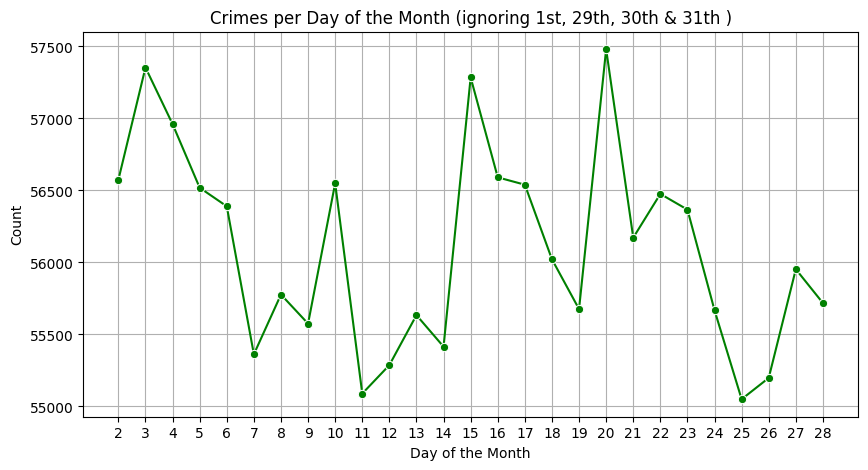

In [210]:
sns.lineplot(x = "Day", 
             y = "count", 
             data = df_days_2_28["Day"].value_counts().reset_index(), 
             marker = "o",
             color = "g")
plt.ylabel("Count")
plt.xlabel("Day of the Month")
plt.xticks(range(2,29))
plt.grid()
plt.title("Crimes per Day of the Month (ignoring 1st, 29th, 30th & 31th )")
plt.show()

Now we can see the days with most rate of crimes are the 3rd, 15th and 20th.

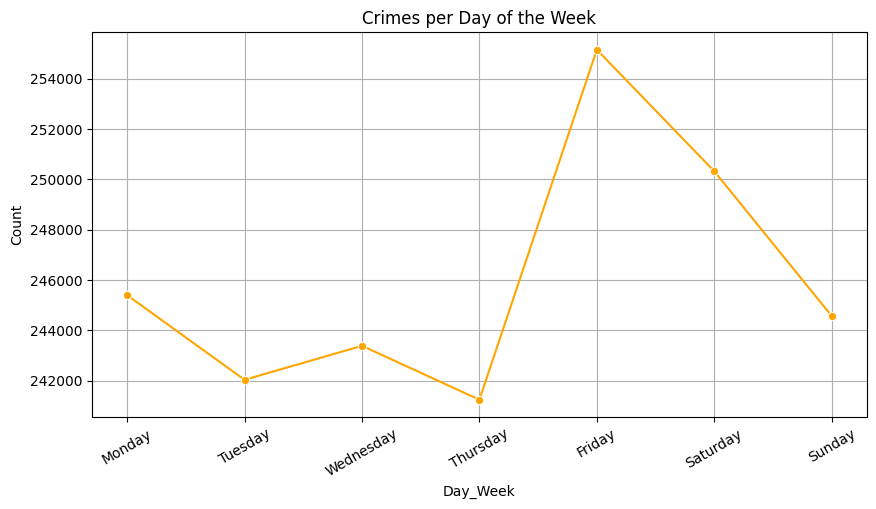

In [211]:
# Dayweek

ax = sns.lineplot(x = "Day_Week", 
             y = "count", 
             data = df["Day_Week"].value_counts().reset_index(), 
             marker = "o",
             color = "orange")

ax.set_ylabel("Count")
ax.set_xticks(range(0,7))
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                  rotation = 30)
plt.grid()
plt.title("Crimes per Day of the Week")
plt.show()

The days with highest rate of crimes are *Friday* and *Saturday*. Weekends makes people slightly crazy.

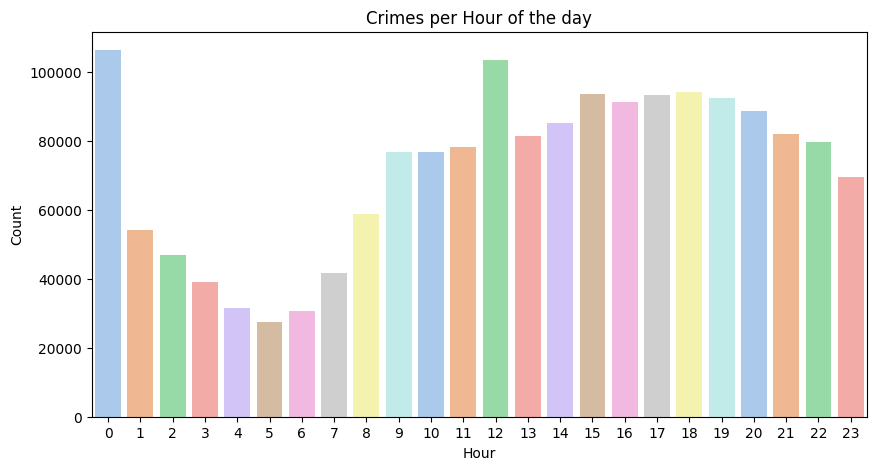

In [212]:
# Hour

sns.barplot(data = df["Hour"].value_counts().reset_index(), x = "Hour", y = "count", hue = "Hour", palette = "pastel", legend = False)
plt.ylabel("Count")
plt.title("Crimes per Hour of the day")
plt.show()

The highest rate of crimes at 00:00 and 12:00, could be a similar case as the first day of the month, errors uploading the data. Without taking into account those hours, After noon until noon is when most of crimes occurs.

#### **3. What are the most common Types of Crimes?**

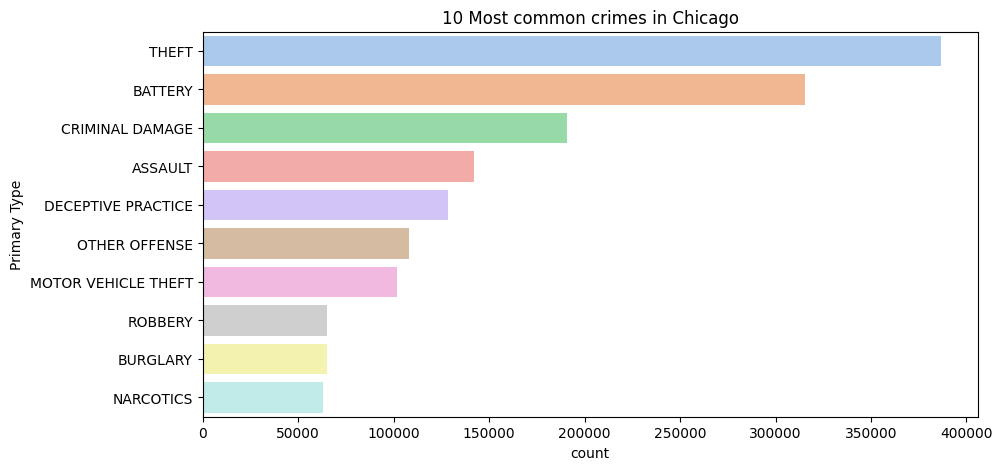

In [213]:
sns.barplot(data = df["Primary Type"].value_counts().reset_index()[:10], 
            y = "Primary Type", 
            x = "count", 
            hue = "Primary Type", 
            palette = "pastel", 
            legend = False)
plt.title("10 Most common crimes in Chicago")
plt.show()

Most common crimes in Chicago are *Theft* and *Battery*

#### **4. How have most common crimes changed through time?**

In [214]:
top_crimes = df["Primary Type"].value_counts().reset_index()[:10]["Primary Type"].to_list()
top_crimes

['THEFT',
 'BATTERY',
 'CRIMINAL DAMAGE',
 'ASSAULT',
 'DECEPTIVE PRACTICE',
 'OTHER OFFENSE',
 'MOTOR VEHICLE THEFT',
 'ROBBERY',
 'BURGLARY',
 'NARCOTICS']

In [215]:
df_top_crimes = df[df["Primary Type"].isin(top_crimes)]
df_top_crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
0,13327763,JH103488,2023-12-31 23:59:00,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1907173.0,2023,01/08/2024 03:59:56 PM,41.900698,-87.637330,"(41.900698378, -87.637329754)",12,31,6,23
1,13325009,JH100002,2023-12-31 23:51:00,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,1871065.0,2023,01/17/2024 03:41:31 PM,41.801584,-87.633177,"(41.801583507, -87.633177068)",12,31,6,23
2,13324997,JH100010,2023-12-31 23:51:00,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,1854148.0,2023,01/08/2024 03:59:56 PM,41.754967,-87.602411,"(41.754966726, -87.602410989)",12,31,6,23
3,13327752,JH102557,2023-12-31 23:50:00,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1902127.0,2023,01/08/2024 03:59:56 PM,41.886816,-87.631524,"(41.886815622, -87.631523712)",12,31,6,23
4,13324881,JH100006,2023-12-31 23:50:00,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1870437.0,2023,01/08/2024 03:59:56 PM,41.800201,-87.691535,"(41.800200965, -87.691535096)",12,31,6,23


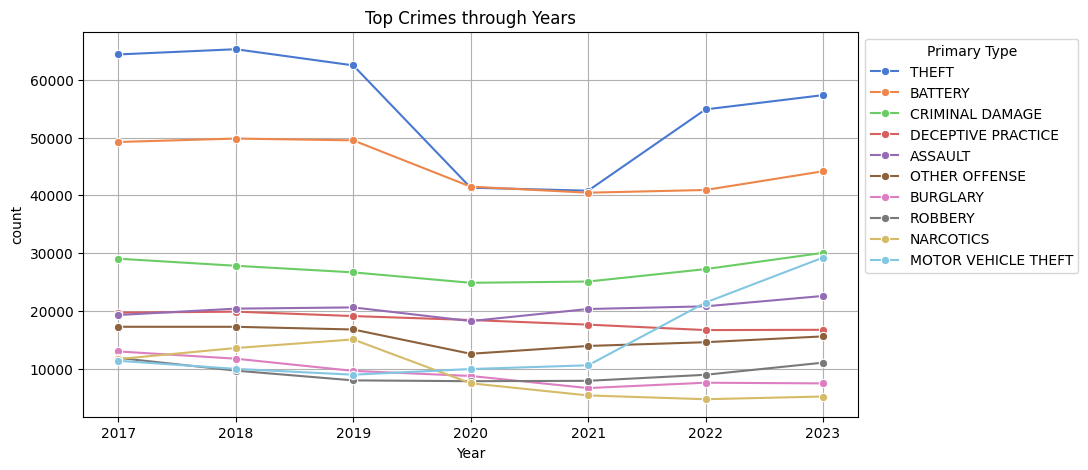

In [216]:
ax = sns.lineplot(data = df_top_crimes[["Primary Type", "Year"]].groupby("Year").value_counts().reset_index(),
                x = "Year",
                y = "count",
                hue = "Primary Type",
                palette = "muted",
                marker = "o")

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Top Crimes through Years")
plt.grid()
plt.show()



There is a decrease in crime rates for most of the type of crimes during pandemic. However, *Motor Vehicle Theft* has increased significaly since 2021. On the other hand, *Narcotics* has had a constant decrease since 2019.

C:\Users\acast\AppData\Local\Temp\ipykernel_20552\193705085.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_crimes["Month Abb"] = df_top_crimes["Date"].dt.month_name().str.slice(stop = 3).str.upper()


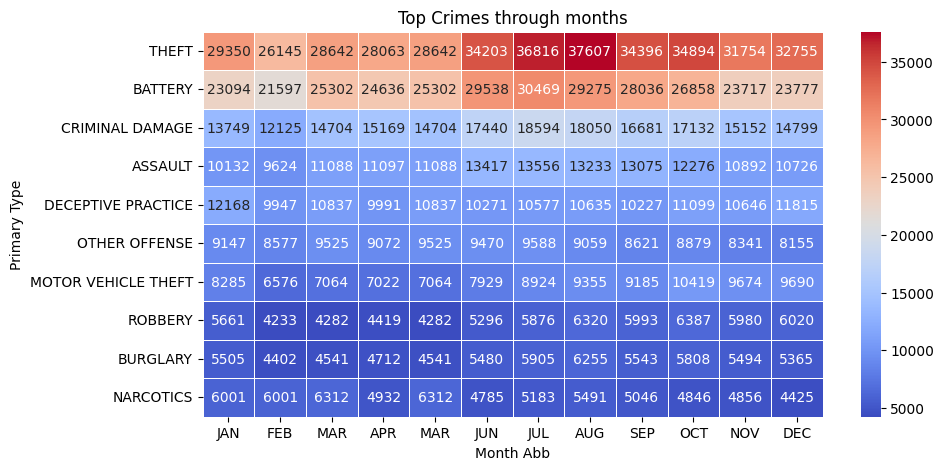

In [217]:
df_top_crimes["Month Abb"] = df_top_crimes["Date"].dt.month_name().str.slice(stop = 3).str.upper()

df_month_crimes = df_top_crimes[["Month Abb", "Primary Type"]].groupby("Month Abb").value_counts().reset_index()

df_month_crimes["Primary Type"] = pd.Categorical(df_month_crimes["Primary Type"], categories = top_crimes)

df_month_pivot = df_month_crimes.pivot(index = "Primary Type", columns = "Month Abb", values = "count")

df_month_pivot = df_month_pivot[['JAN', 'FEB', 'MAR', 'APR', 'MAR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC']]

sns.heatmap(data = df_month_pivot, annot = True, fmt = "d", linewidths = 0.5, cmap="coolwarm")
plt.title("Top Crimes through months")
plt.show()

*Theft* and *Battery* have high rates during summer season. The other top crimes have lower rates and do not show a seasonal trend.

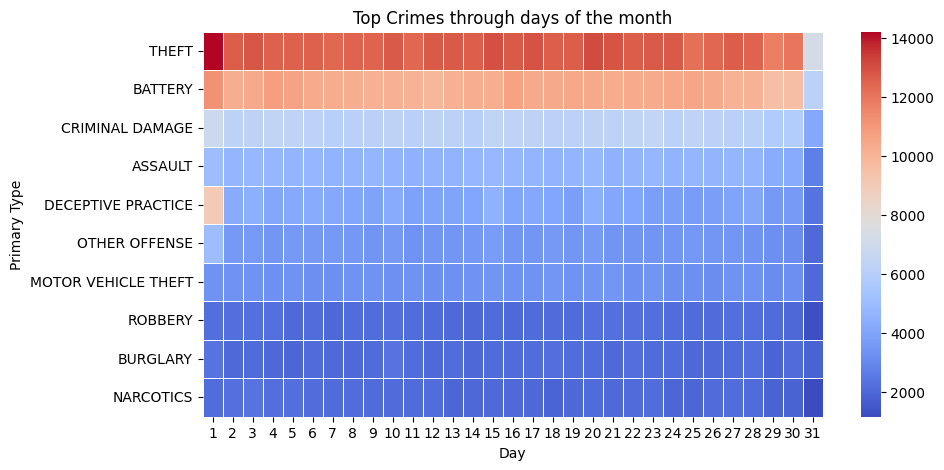

In [218]:
df_day_crimes = df_top_crimes[["Day", "Primary Type"]].groupby("Day").value_counts().reset_index()

df_day_crimes["Primary Type"] = pd.Categorical(df_day_crimes["Primary Type"], categories = top_crimes)

df_day_pivot = df_day_crimes.pivot(index = "Primary Type", columns = "Day", values = "count")


sns.heatmap(data = df_day_pivot, linewidths = 0.5, cmap = "coolwarm")
plt.title("Top Crimes through days of the month")
plt.show()

Patterns through days are constants for all top crimes in Chicago

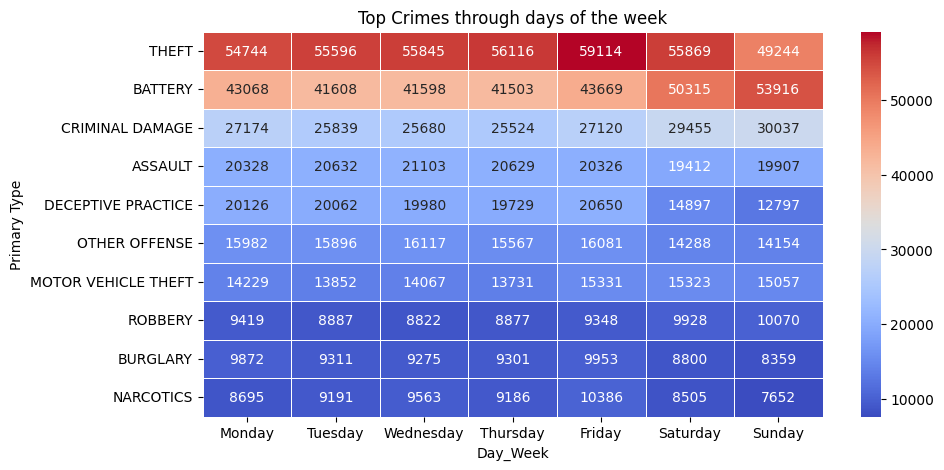

In [219]:
df_day_week = df_top_crimes[["Day_Week", "Primary Type"]].groupby("Day_Week").value_counts().reset_index()

df_day_week["Primary Type"] = pd.Categorical(df_day_week["Primary Type"], categories = top_crimes)

df_day_week_pivot = df_day_week.pivot(index = "Primary Type", columns = "Day_Week", values = "count")


df_day_week_pivot.rename(columns={0: "Monday",
                            1: "Tuesday",
                            2: "Wednesday",
                            3: "Thursday",
                            4: "Friday",
                            5: "Saturday",
                            6: "Sunday"}, inplace=True)


sns.heatmap(data = df_day_week_pivot, annot = True, fmt = "d", linewidths = 0.5, cmap = "coolwarm")
plt.title("Top Crimes through days of the week")
plt.show()

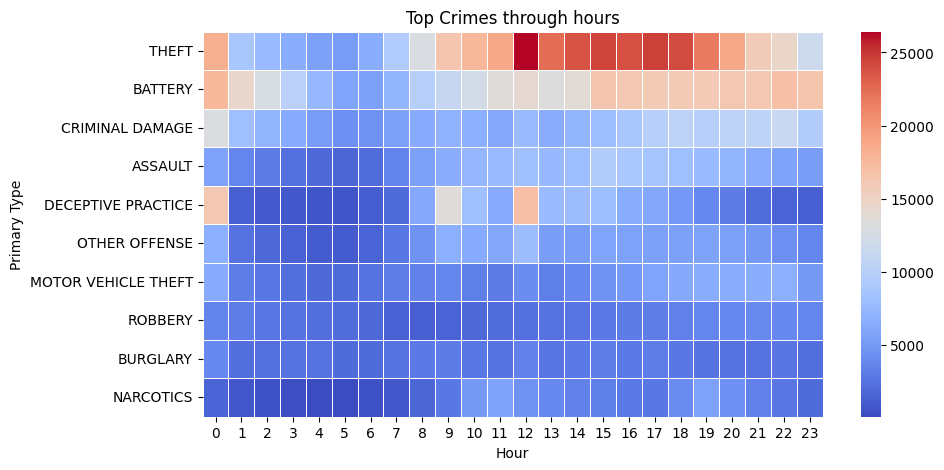

In [220]:
df_hour_crimes = df_top_crimes[["Hour", "Primary Type"]].groupby("Hour").value_counts().reset_index()

df_hour_crimes["Primary Type"] = pd.Categorical(df_hour_crimes["Primary Type"], categories = top_crimes)

df_hour_pivot = df_hour_crimes.pivot(index = "Primary Type", columns = "Hour", values = "count")


sns.heatmap(data = df_hour_pivot, linewidths = 0.5, cmap = "coolwarm")
plt.title("Top Crimes through hours")
plt.show()

Most of the top crimes ocurr after noon.

#### **5. Crimes with Arrest**

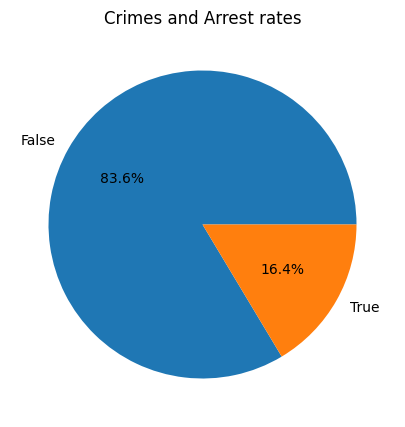

In [221]:
plt.pie(x = df["Arrest"].value_counts().reset_index()["count"], labels = df["Arrest"].value_counts().reset_index()["Arrest"], autopct='%1.1f%%')
plt.title("Crimes and Arrest rates")
plt.show()  

Most of crimes didn't have arrests

In [222]:
df_arrest = df[df["Arrest"] == True]
df_arrest.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
1,13325009,JH100002,2023-12-31 23:51:00,051XX S PRINCETON AVE,0550,ASSAULT,AGGRAVATED POLICE OFFICER - HANDGUN,STREET,True,False,...,1871065.0,2023,01/17/2024 03:41:31 PM,41.801584,-87.633177,"(41.801583507, -87.633177068)",12,31,6,23
6,13327217,JH100004,2023-12-31 23:48:00,037XX W BELMONT AVE,2250,LIQUOR LAW VIOLATION,LIQUOR LICENSE VIOLATION,BAR OR TAVERN,True,False,...,1921016.0,2023,01/08/2024 03:59:56 PM,41.939165,-87.721359,"(41.939165312, -87.721359403)",12,31,6,23
12,13324901,JH100154,2023-12-31 23:31:00,003XX N STATE ST,2890,PUBLIC PEACE VIOLATION,OTHER VIOLATION,STREET,True,False,...,1902537.0,2023,01/08/2024 03:59:56 PM,41.887919,-87.628019,"(41.887919288, -87.628019052)",12,31,6,23
19,13324782,JG561345,2023-12-31 23:25:00,033XX W 23RD ST,2022,NARCOTICS,POSSESS - COCAINE,ALLEY,True,False,...,1888512.0,2023,01/08/2024 03:59:56 PM,41.849901,-87.709269,"(41.849901426, -87.709269243)",12,31,6,23
20,13324790,JG561342,2023-12-31 23:25:00,035XX N CLARK ST,0460,BATTERY,SIMPLE,SIDEWALK,True,False,...,1923729.0,2023,01/08/2024 03:59:56 PM,41.946242,-87.655743,"(41.946241881, -87.655743334)",12,31,6,23


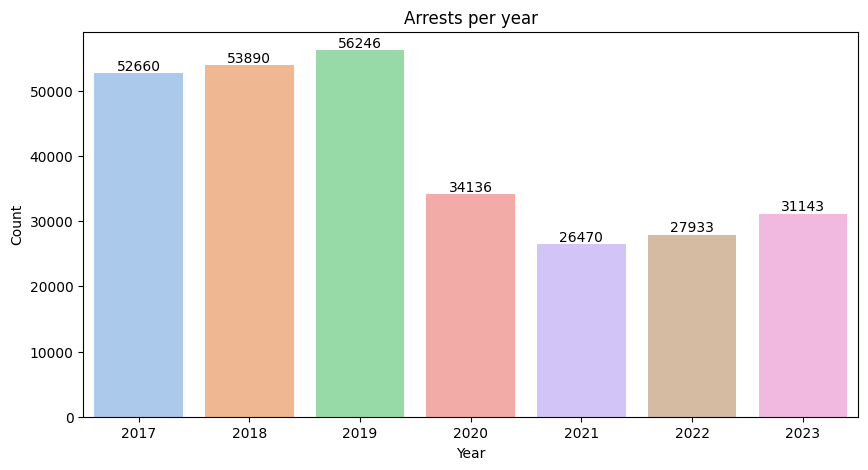

In [223]:
ax = sns.countplot(data = df_arrest, x = "Year", hue = "Year", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)
plt.ylabel("Count")
plt.title("Arrests per year")
plt.show()

There was a significantly decrease of arrests since 2020. Possibly an effect of the pandemic.

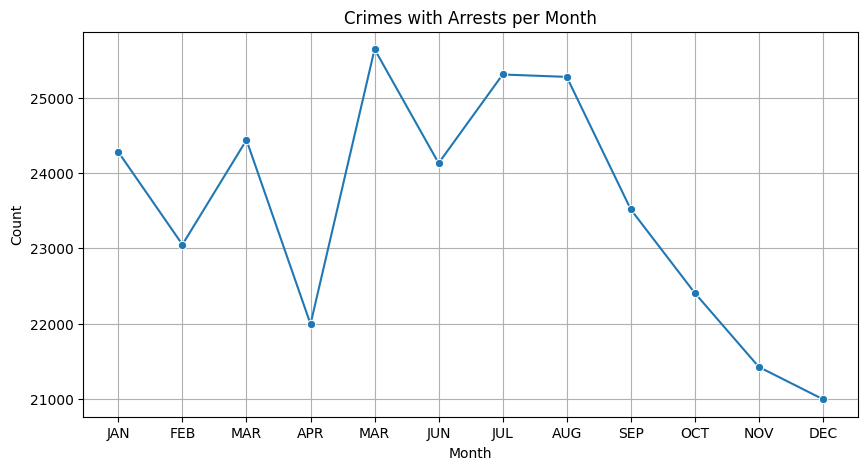

In [224]:
# Month
sns.lineplot(x = "Month", 
             y = "count", 
             data = df_arrest["Month"].value_counts().reset_index(), 
             marker = "o")
plt.ylabel("Count")
plt.xticks(range(1,13), ['JAN', 'FEB', 'MAR', 'APR', 'MAR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.grid()
plt.title("Crimes with Arrests per Month")
plt.show()

March is the month with most Arrests

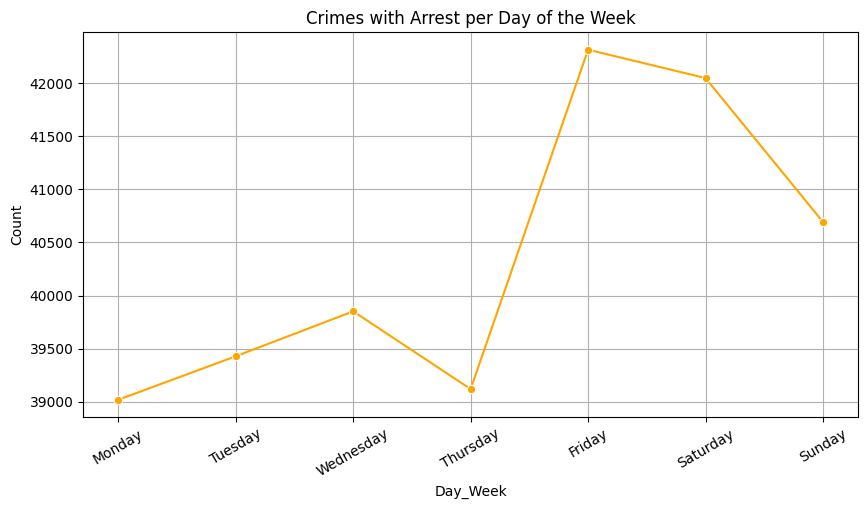

In [225]:
# Dayweek

ax = sns.lineplot(x = "Day_Week", 
             y = "count", 
             data = df_arrest["Day_Week"].value_counts().reset_index(), 
             marker = "o",
             color = "orange")

ax.set_ylabel("Count")
ax.set_xticks(range(0,7))
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                  rotation = 30)
plt.grid()
plt.title("Crimes with Arrest per Day of the Week")
plt.show()

Arrests are more common during weekends

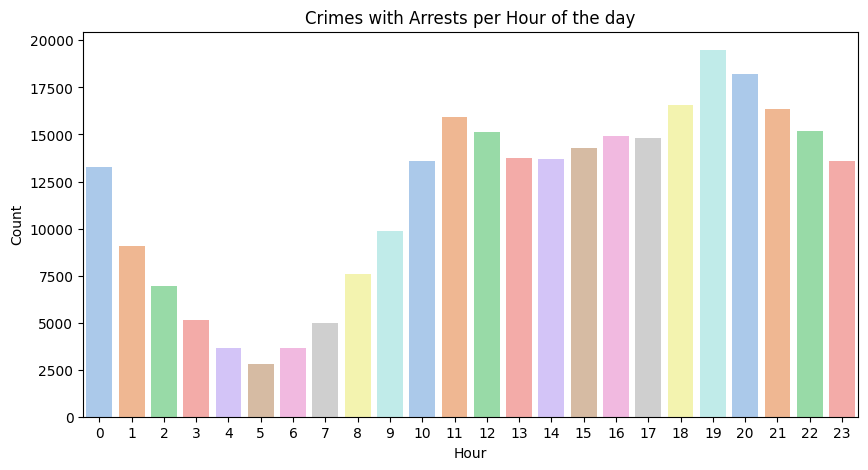

In [226]:
# Hour

sns.barplot(data = df_arrest["Hour"].value_counts().reset_index(), x = "Hour", y = "count", hue = "Hour", palette = "pastel", legend = False)
plt.ylabel("Count")
plt.title("Crimes with Arrests per Hour of the day")
plt.show()

Arrests are more common at evening.

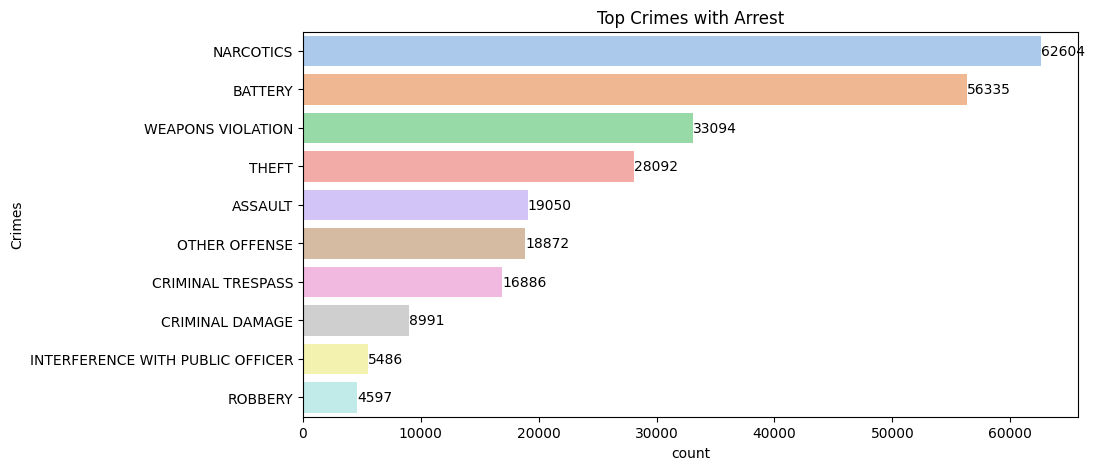

In [227]:
ax = sns.barplot(data = df_arrest["Primary Type"].value_counts().reset_index()[:10], y = "Primary Type", x = "count", hue = "Primary Type", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Crimes")
plt.title("Top Crimes with Arrest")
plt.show()

Crimes with most arrests are *Narcotics* and *Battery*

#### **6. Domestic Crimes**

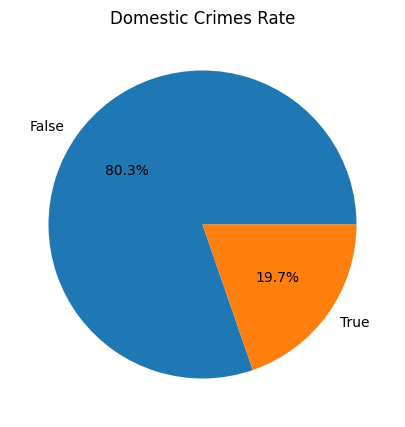

In [228]:
plt.pie(x = df["Domestic"].value_counts().reset_index()["count"], labels = df["Domestic"].value_counts().reset_index()["Domestic"], autopct='%1.1f%%')
plt.title("Domestic Crimes Rate")
plt.show()  

Most of Crimes are not domestic

In [229]:
df_domestic = df[df["Domestic"] == True]
df_domestic.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
2,13324997,JH100010,2023-12-31 23:51:00,009XX E 77TH ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,False,True,...,1854148.0,2023,01/08/2024 03:59:56 PM,41.754967,-87.602411,"(41.754966726, -87.602410989)",12,31,6,23
4,13324881,JH100006,2023-12-31 23:50:00,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1870437.0,2023,01/08/2024 03:59:56 PM,41.800201,-87.691535,"(41.800200965, -87.691535096)",12,31,6,23
10,13324983,JG561339,2023-12-31 23:39:00,093XX S STEWART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1843128.0,2023,01/08/2024 03:59:56 PM,41.724913,-87.632603,"(41.724912547, -87.63260343)",12,31,6,23
22,13324853,JH100013,2023-12-31 23:15:00,028XX S STATE ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,CHA APARTMENT,False,True,...,1886065.0,2023,01/08/2024 03:59:56 PM,41.842709,-87.626890,"(41.842709067, -87.626890005)",12,31,6,23
25,13324830,JG561327,2023-12-31 23:08:00,063XX S SANGAMON ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1862694.0,2023,01/08/2024 03:59:56 PM,41.778703,-87.648403,"(41.778702876, -87.648402834)",12,31,6,23


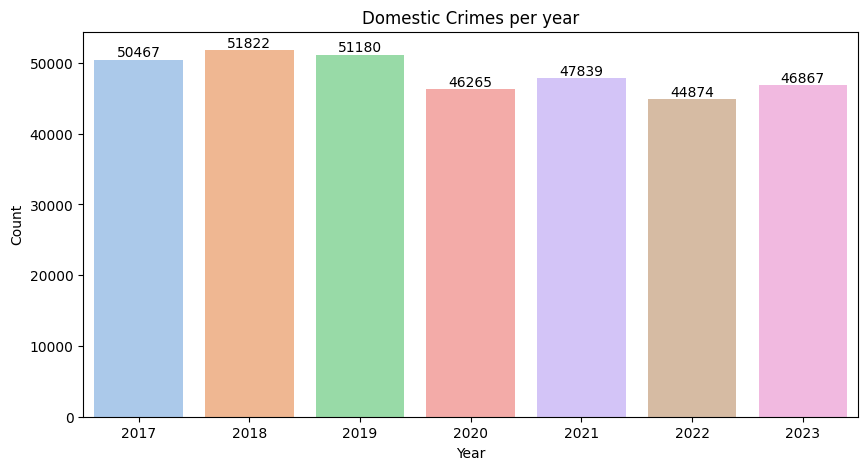

In [230]:
ax = sns.countplot(data = df_domestic, x = "Year", hue = "Year", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)
plt.ylabel("Count")
plt.title("Domestic Crimes per year")
plt.show()

The number of domestic crimes are very similar, with a slightly decrease after pandemic.

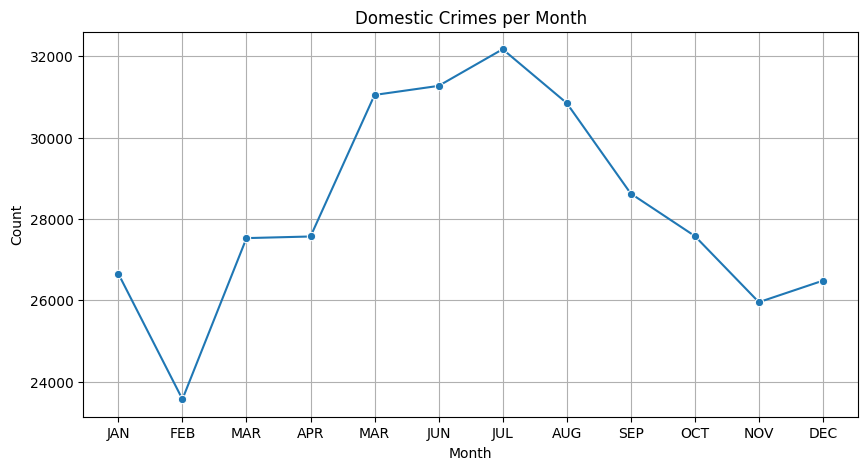

In [231]:
# Month
sns.lineplot(x = "Month", 
             y = "count", 
             data = df_domestic["Month"].value_counts().reset_index(), 
             marker = "o")
plt.ylabel("Count")
plt.xticks(range(1,13), ['JAN', 'FEB', 'MAR', 'APR', 'MAR', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
plt.grid()
plt.title("Domestic Crimes per Month")
plt.show()

There is a increase of Domestic Crimes during summer season.

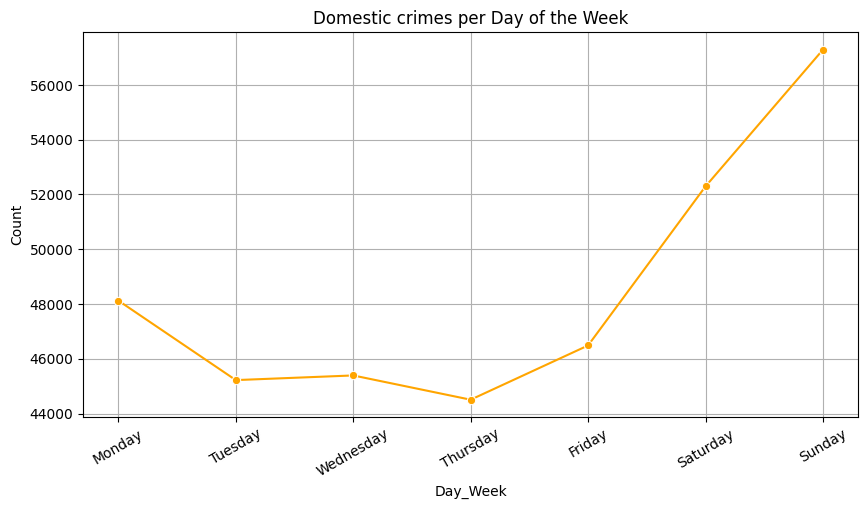

In [232]:
# Dayweek

ax = sns.lineplot(x = "Day_Week", 
             y = "count", 
             data = df_domestic["Day_Week"].value_counts().reset_index(), 
             marker = "o",
             color = "orange")

ax.set_ylabel("Count")
ax.set_xticks(range(0,7))
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
                  rotation = 30)
plt.grid()
plt.title("Domestic crimes per Day of the Week")
plt.show()

Sunday is the day with most domestic crimes

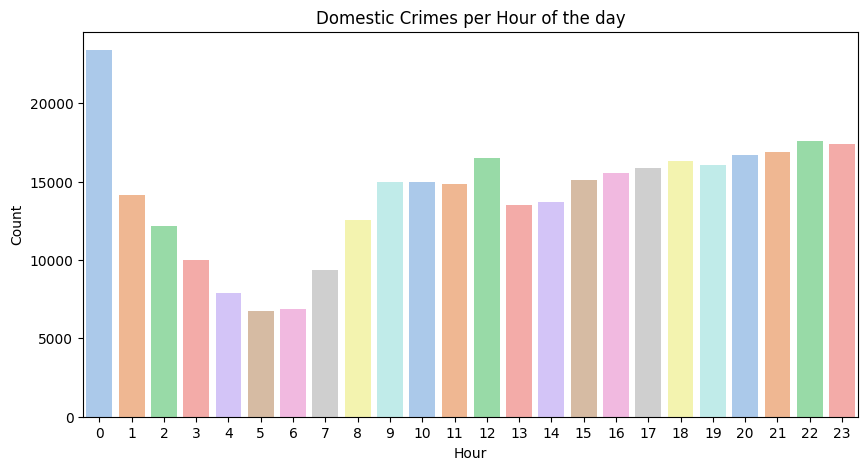

In [233]:
# Hour

sns.barplot(data = df_domestic["Hour"].value_counts().reset_index(), x = "Hour", y = "count", hue = "Hour", palette = "pastel", legend = False)
plt.ylabel("Count")
plt.title("Domestic Crimes per Hour of the day")
plt.show()

Domestic crimes are not common around 6am, but their have a progressive increase at evening

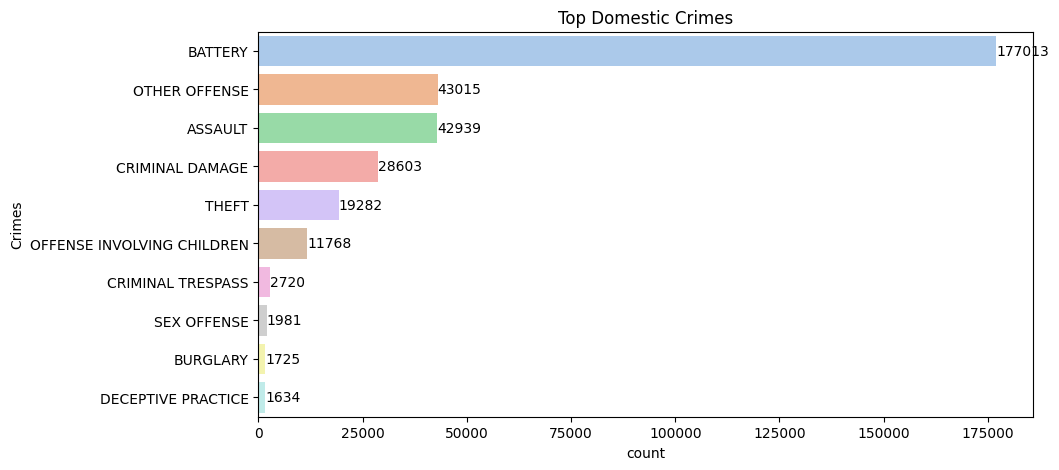

In [234]:
ax = sns.barplot(data = df_domestic["Primary Type"].value_counts().reset_index()[:10], y = "Primary Type", x = "count", hue = "Primary Type", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Crimes")
plt.title("Top Domestic Crimes")
plt.show()

The most common domestic crime (by far) is *Battery*

#### **7. Description Analysis Top 3 Crimes**

In [235]:
top_crimes[:3]

['THEFT', 'BATTERY', 'CRIMINAL DAMAGE']

##### THEFT

In [236]:
df_theft = df[df["Primary Type"] == "THEFT"]
df_theft.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
3,13327752,JH102557,2023-12-31 23:50:00,001XX W WACKER DR,0890,THEFT,FROM BUILDING,BAR OR TAVERN,False,False,...,1902127.0,2023,01/08/2024 03:59:56 PM,41.886816,-87.631524,"(41.886815622, -87.631523712)",12,31,6,23
14,13324856,JH100114,2023-12-31 23:30:00,072XX S CALIFORNIA AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,1856609.0,2023,01/08/2024 03:59:56 PM,41.762261,-87.692965,"(41.762260854, -87.692965274)",12,31,6,23
61,13326455,JH101776,2023-12-31 22:00:00,034XX W 23RD ST,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1888495.0,2023,01/08/2024 03:59:56 PM,41.849868,-87.711696,"(41.849867932, -87.711695679)",12,31,6,22
63,13325011,JH100266,2023-12-31 22:00:00,056XX S WESTERN AVE,0810,THEFT,OVER $500,STREET,False,True,...,1867288.0,2023,01/08/2024 03:59:56 PM,41.791517,-87.683976,"(41.791516727, -87.683975972)",12,31,6,22
66,13325407,JH100655,2023-12-31 22:00:00,030XX W JACKSON BLVD,0820,THEFT,$500 AND UNDER,STREET,False,False,...,1898533.0,2023,01/08/2024 03:59:56 PM,41.877362,-87.701945,"(41.877361575, -87.70194469)",12,31,6,22


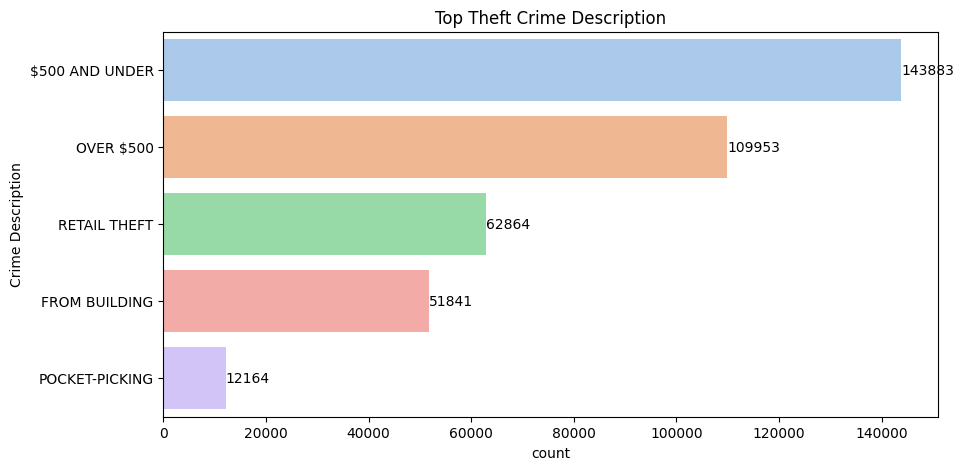

In [237]:
ax = sns.barplot(data = df_theft["Description"].value_counts().reset_index()[:5], y = "Description", x = "count", hue = "Description", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Crime Description")
plt.title("Top Theft Crime Description")
plt.show()

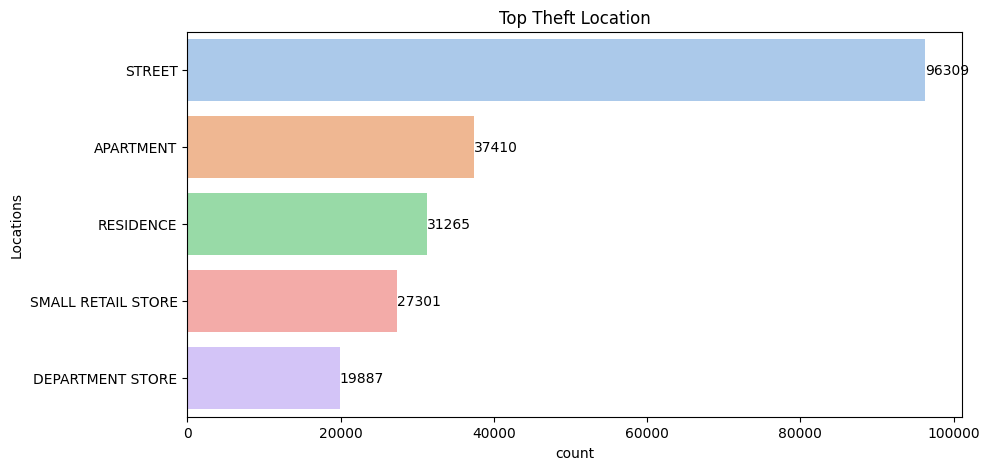

In [238]:
ax = sns.barplot(data = df_theft["Location Description"].value_counts().reset_index()[:5], y = "Location Description", x = "count", hue = "Location Description", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Locations")
plt.title("Top Theft Location")
plt.show()


##### BATTERY

In [239]:
df_battery = df[df["Primary Type"] == "BATTERY"]
df_battery.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
4,13324881,JH100006,2023-12-31 23:50:00,051XX S WASHTENAW AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,1870437.0,2023,01/08/2024 03:59:56 PM,41.800201,-87.691535,"(41.800200965, -87.691535096)",12,31,6,23
5,13324829,JG561343,2023-12-31 23:50:00,014XX N LOCKWOOD AVE,0454,BATTERY,"AGGRAVATED P.O. - HANDS, FISTS, FEET, NO / MIN...",STREET,False,False,...,1909050.0,2023,01/08/2024 03:59:56 PM,41.906519,-87.758360,"(41.906519104, -87.758359629)",12,31,6,23
7,13324845,JH100031,2023-12-31 23:45:00,016XX W WALNUT ST,0460,BATTERY,SIMPLE,OTHER (SPECIFY),False,False,...,1901800.0,2023,01/08/2024 03:59:56 PM,41.886136,-87.668164,"(41.886136329, -87.668163684)",12,31,6,23
10,13324983,JG561339,2023-12-31 23:39:00,093XX S STEWART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,1843128.0,2023,01/08/2024 03:59:56 PM,41.724913,-87.632603,"(41.724912547, -87.63260343)",12,31,6,23
16,13325290,JH100363,2023-12-31 23:30:00,023XX S WENTWORTH AVE,0460,BATTERY,SIMPLE,SIDEWALK,False,False,...,1888584.0,2023,01/08/2024 03:59:56 PM,41.849653,-87.631941,"(41.849652812, -87.631941082)",12,31,6,23


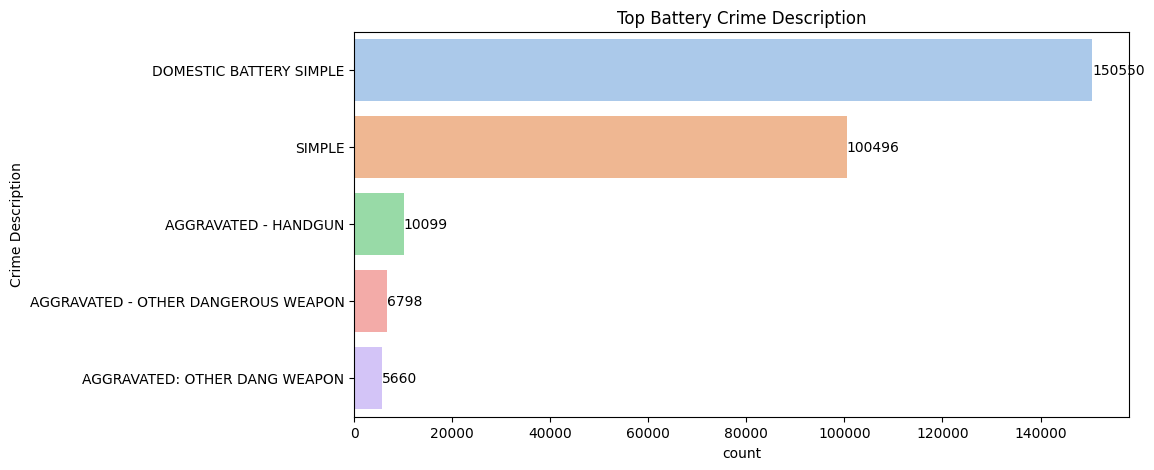

In [240]:
ax = sns.barplot(data = df_battery["Description"].value_counts().reset_index()[:5], y = "Description", x = "count", hue = "Description", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Crime Description")
plt.title("Top Battery Crime Description")
plt.show()

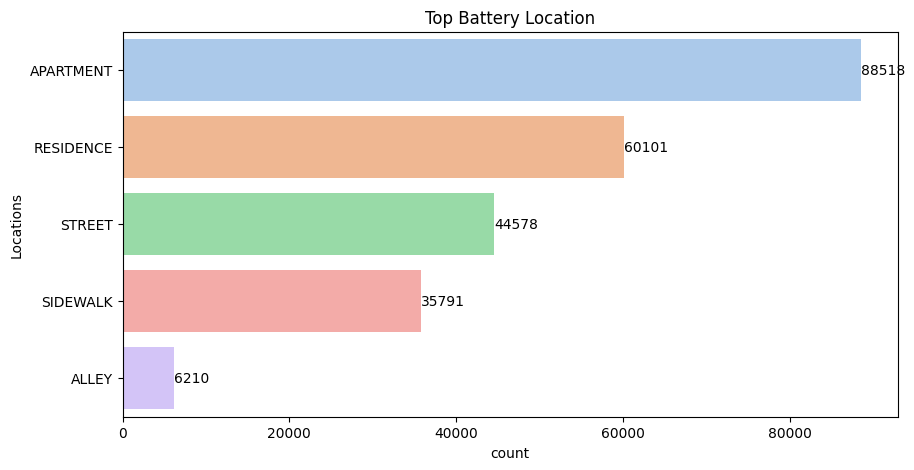

In [241]:
ax = sns.barplot(data = df_battery["Location Description"].value_counts().reset_index()[:5], y = "Location Description", x = "count", hue = "Location Description", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Locations")
plt.title("Top Battery Location")
plt.show()


##### CRIMINAL DAMAGE

In [242]:
df_damage = df[df["Primary Type"] == "CRIMINAL DAMAGE"]
df_damage.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Y Coordinate,Year,Updated On,Latitude,Longitude,Location,Month,Day,Day_Week,Hour
0,13327763,JH103488,2023-12-31 23:59:00,010XX N ORLEANS ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1907173.0,2023,01/08/2024 03:59:56 PM,41.900698,-87.637330,"(41.900698378, -87.637329754)",12,31,6,23
11,13324836,JG561340,2023-12-31 23:38:00,020XX W 67TH PL,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1859889.0,2023,01/08/2024 03:59:56 PM,41.771158,-87.674525,"(41.771157898, -87.67452544)",12,31,6,23
13,13335391,JH112189,2023-12-31 23:30:00,050XX W QUINCY ST,1320,CRIMINAL DAMAGE,TO VEHICLE,VEHICLE NON-COMMERCIAL,False,False,...,1898533.0,2023,01/13/2024 03:40:45 PM,41.877620,-87.750897,"(41.877620274, -87.750896624)",12,31,6,23
31,13325468,JH100757,2023-12-31 23:00:00,081XX S CORNELL AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,1851257.0,2023,01/08/2024 03:59:56 PM,41.746916,-87.584187,"(41.746915573, -87.584187231)",12,31,6,23
38,13326498,JH101958,2023-12-31 23:00:00,072XX S WHIPPLE ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,1856540.0,2023,01/08/2024 03:59:56 PM,41.762105,-87.699077,"(41.762105399, -87.699076969)",12,31,6,23


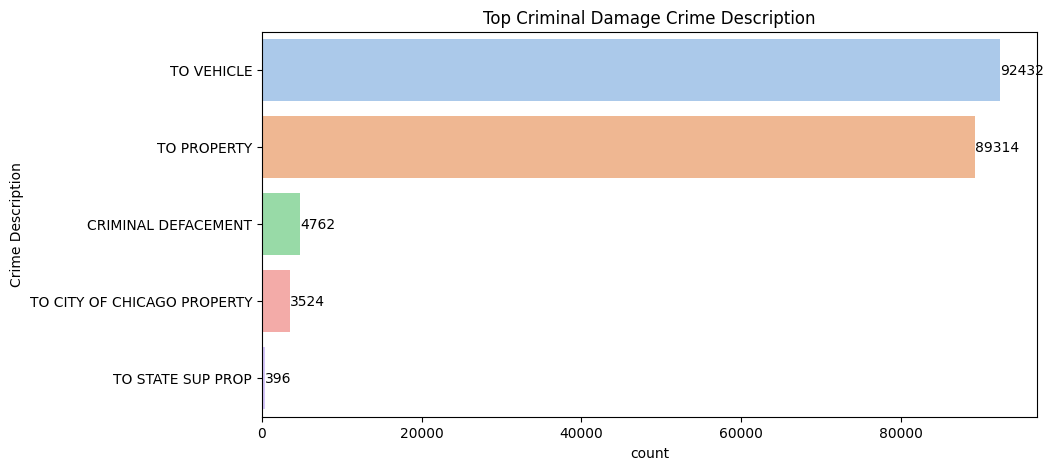

In [243]:
ax = sns.barplot(data = df_damage["Description"].value_counts().reset_index()[:5], y = "Description", x = "count", hue = "Description", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Crime Description")
plt.title("Top Criminal Damage Crime Description")
plt.show()

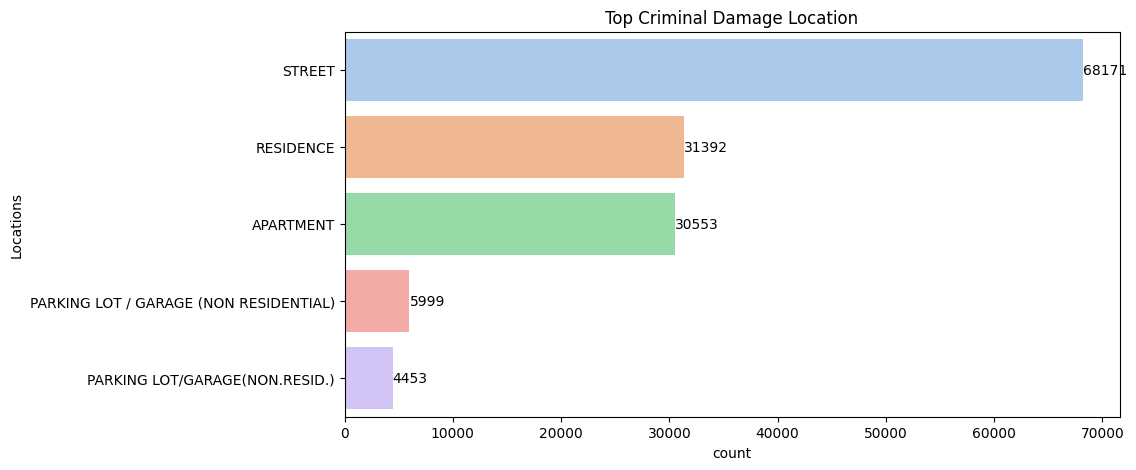

In [244]:
ax = sns.barplot(data = df_damage["Location Description"].value_counts().reset_index()[:5], y = "Location Description", x = "count", hue = "Location Description", palette = "pastel", legend = False)

for label in ax.containers:
    ax.bar_label(label)

plt.ylabel("Locations")
plt.title("Top Criminal Damage Location")
plt.show()

#### **8. Geographic Data Visualization**

##### Beat

In [245]:
import geojson

df_beat = df["Beat"].value_counts().reset_index()
df_beat.sort_values(by = ["count"], ascending = False)

,Beat,count
0,1834,20342
1,421,14358
2,1831,13275
3,511,13111
4,624,12899
...,...,...
270,1621,2121
271,1653,1313
272,1655,639
273,1652,467


In [246]:
df_beat.shape

(275, 2)

In [247]:
with open("Data/Beats.geojson") as f:
    beat_geo = geojson.load(f)

beats = []
for i in range(len(beat_geo["features"])):
    beats.append(int(beat_geo["features"][i]["properties"]["beat_num"]))

beats = pd.DataFrame(beats)

beats.sort_values(by = 0)

,0
87,111
92,112
125,113
86,114
90,121
...,...
193,2534
192,2535
263,3100
1,3100


In [248]:
beats.shape

(277, 1)

In [249]:
df_beat_complete = df_beat.merge(beats, left_on = "Beat", right_on = 0, how = "right")
df_beat_complete.fillna(0, inplace = True)
df_beat_complete.rename(columns = {"Beat" : "beat_num"}, inplace = True)
df_beat_complete["beat_num"] = df_beat_complete["beat_num"].astype('str')
df_beat_complete["beat_num"] = df_beat_complete["beat_num"].apply(lambda x: "0"+ x if len(x) == 3 else x)
df_beat_complete["count"] = df_beat_complete["count"].astype('int')
df_beat_complete.head()

,beat_num,count,0
0,1713,3803,1713
1,3100,0,3100
2,1651,3079,1651
3,1914,6107,1914
4,1915,4990,1915


In [250]:
df_beat_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   beat_num  277 non-null    object
 1   count     277 non-null    int32 
 2   0         277 non-null    int64 
dtypes: int32(1), int64(1), object(1)
memory usage: 5.5+ KB


In [251]:
chicago_map = folium.Map(location = [41.8, -87.7], zoom_start = 11, tiles = "Cartodb Positron")

cp1 = folium.Choropleth(geo_data = beat_geo,
                       data = df_beat_complete,
                       columns = ["beat_num", "count"],
                       key_on = "feature.properties.beat_num",
                       fill_color = "OrRd",
                       fill_opacity = 0.7,
                       line_opacity = 0.2,
                       legend_name = "Crimes per Beats from 2017 to 2023",
                       reset = True).add_to(chicago_map) 


cont = 0

for s in cp1.geojson.data['features']:
    # print(df_beat_complete.loc[df_beat_complete["beat_num"] == s['properties']['beat_num'], "count"])

    if s['properties']['beat_num'] == "3100":
        s['properties']['Crime'] = 0
    else:
        s['properties']['Crime'] = list(df_beat_complete.loc[df_beat_complete["beat_num"] == s['properties']['beat_num'], "count"])[0]
    # s['properties']['Crime'] = df_beat_complete.loc[df_beat_complete["beat_num"] == s['properties']['beat_num'], "count"] # Set the number of events based on count


folium.GeoJsonTooltip(['beat_num', "Crime"]).add_to(cp1.geojson) 

chicago_map